* MSV_HoVaTen:
521H0501_Phan Minh Hoàng,
521H0398_Lê Nguyễn Viết Hiệp,
521H0276_Trang Sĩ Nam



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
data = pd.read_csv('bike_buyers.csv')
print(data.shape)

(1000, 13)


In [ ]:
data = data.dropna()

In [ ]:
# Check duplicate
data.duplicated().value_counts()

False    952
Name: count, dtype: int64

In [ ]:
data = data.drop_duplicates()
data.shape

(952, 13)

# Transformation

In [ ]:
# Tranform data
from sklearn.preprocessing import LabelEncoder

types = data.dtypes
names = list(data.columns)

le = LabelEncoder()
for i in range(len(types)):
    if types.iloc[i]=='object':
        le.fit_transform(data[names[i]])
        data[names[i]] = le.transform(data[names[i]])

# Normalization


In [ ]:
from sklearn.preprocessing import MinMaxScaler
features = data.drop(['Purchased Bike'], axis=1)

scaler = MinMaxScaler()
model=scaler.fit(features)
scaled_data= pd.DataFrame(model.transform(features))

In [ ]:
# split data
X = scaled_data
y = data['Purchased Bike']

# Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
select_feature =  SelectKBest(score_func=chi2, k = 8)
f_best = select_feature.fit(X, y)               
X_new = f_best.transform(X)
X_new.shape

(952, 8)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

X_train, X_test, Y_train, Y_test = train_test_split(X_new, y, random_state = 42, test_size=0.2)

# Cải thiện model bằng HyperParameters Tuning

# K Nearest Neighbor

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3, 'p': 1}


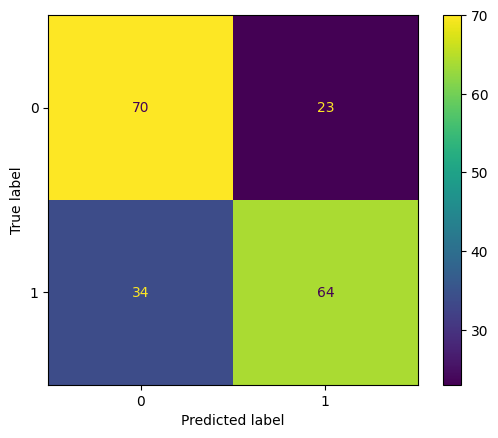

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()

param_grid = {'n_neighbors': [3 , 1 , 4 , 6], 'p': [1, 2], 'metric': ['euclidean']}
scorer = make_scorer(accuracy_score)

grid_search = GridSearchCV(KNN, param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, Y_train)

best_KNN = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

Y_pred = best_KNN.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71        93
           1       0.74      0.65      0.69        98

    accuracy                           0.70       191
   macro avg       0.70      0.70      0.70       191
weighted avg       0.71      0.70      0.70       191



# Decision Tree

Best Hyperparameters: {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}


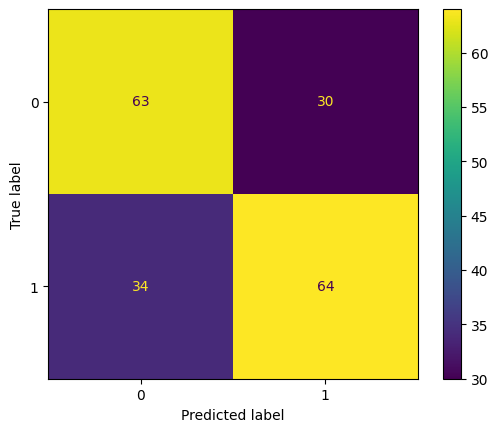

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(max_depth=7)

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

print("Best Hyperparameters:", grid_search.best_params_)

final_dTree = grid_search.best_estimator_
final_dTree.fit(X_train, Y_train)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, final_dTree.predict(X_test)))
disp.plot()

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71        93
           1       0.74      0.65      0.69        98

    accuracy                           0.70       191
   macro avg       0.70      0.70      0.70       191
weighted avg       0.71      0.70      0.70       191



# Gaussian Naive Bayes

Best Hyperparameters: {'var_smoothing': 0.1}


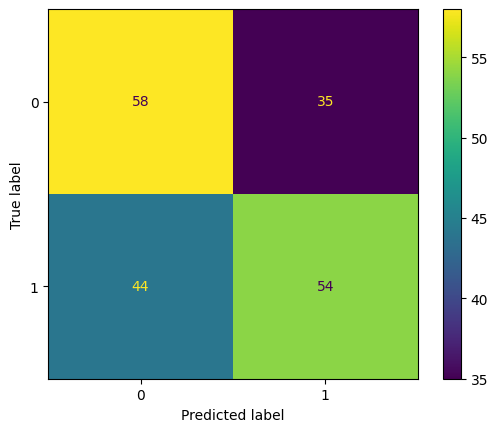

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
}

grid_search = GridSearchCV(gnb, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

Y_pred = best_model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.57      0.62      0.59        93
           1       0.61      0.55      0.58        98

    accuracy                           0.59       191
   macro avg       0.59      0.59      0.59       191
weighted avg       0.59      0.59      0.59       191



# Multinomial Naive Bayes

Best Hyperparameters: {'alpha': 0.01, 'fit_prior': False}


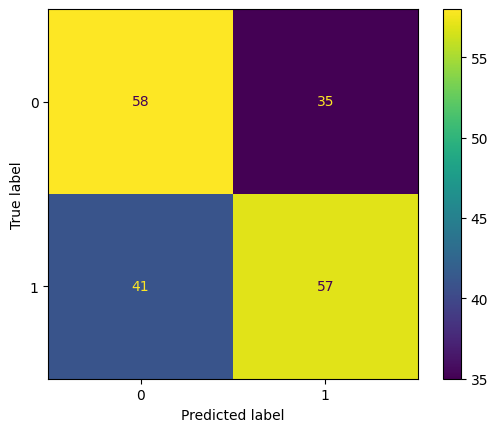

In [ ]:
from sklearn.naive_bayes import MultinomialNB

param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1, 2],  
    'fit_prior': [True, False]       
}

mnb = MultinomialNB()
clf = GridSearchCV(mnb, param_grid, cv=5)  #

clf.fit(X_train, Y_train)

best_params = clf.best_params_
best_model = clf.best_estimator_
print("Best Hyperparameters:", best_params)

Y_pred = best_model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.59      0.62      0.60        93
           1       0.62      0.58      0.60        98

    accuracy                           0.60       191
   macro avg       0.60      0.60      0.60       191
weighted avg       0.60      0.60      0.60       191



# Bernoulli Naive Bayes

Best Alpha: 0.1
Best Binarize: 0.1


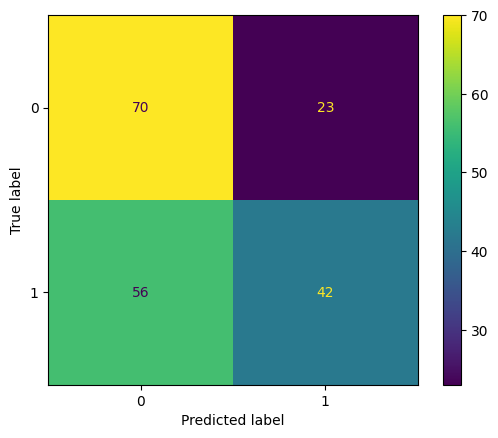

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

alpha_values = [0.1, 0.5, 1.0, 2.0]
binarize_values = [0.0, 0.1, 0.5]

best_accuracy = 0
best_alpha = None
best_binarize = None

for alpha in alpha_values:
    for binarize in binarize_values:

        bnb.set_params(alpha=alpha, binarize=binarize)
        
        bnb.fit(X_train, Y_train)

        Y_pred = bnb.predict(X_test)
        
        accuracy = accuracy_score(Y_test, Y_pred)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_alpha = alpha
            best_binarize = binarize

print("Best Alpha:", best_alpha)
print("Best Binarize:", best_binarize)

bnb.set_params(alpha=best_alpha, binarize=best_binarize)
bnb.fit(X_train, Y_train)

Y_pred = bnb.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.56      0.75      0.64        93
           1       0.65      0.43      0.52        98

    accuracy                           0.59       191
   macro avg       0.60      0.59      0.58       191
weighted avg       0.60      0.59      0.58       191



# Logistic Regession

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


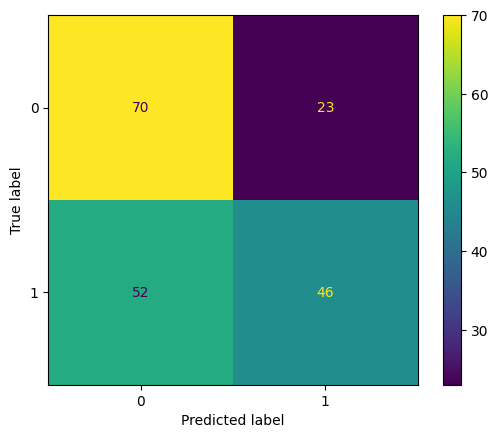

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2'],         
    'C': [0.001, 0.01, 0.1, 1, 10],  
    'solver': ['liblinear', 'saga'] 
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.57      0.75      0.65        93
           1       0.67      0.47      0.55        98

    accuracy                           0.61       191
   macro avg       0.62      0.61      0.60       191
weighted avg       0.62      0.61      0.60       191



# Support Vector Machine

Best Hyperparameters: {'C': 1, 'gamma': 1, 'kernel': 'poly'}


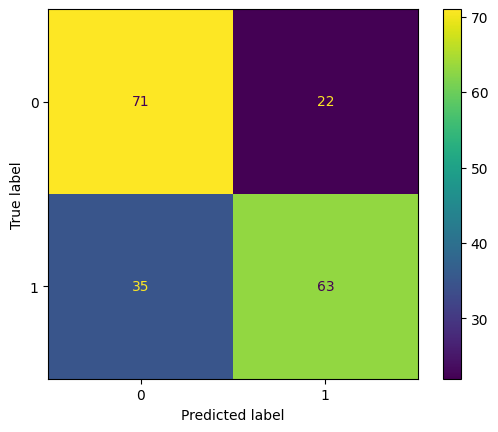

In [ ]:
from sklearn.svm import SVC

svm = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],           
    'gamma': [0.001, 0.01, 0.1, 1],  
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

scorer = 'accuracy'

grid_search = GridSearchCV(svm, param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, Y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_svm = grid_search.best_estimator_
Y_pred = best_svm.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71        93
           1       0.74      0.64      0.69        98

    accuracy                           0.70       191
   macro avg       0.71      0.70      0.70       191
weighted avg       0.71      0.70      0.70       191



# Ensamble

* Bagging

c:\Users\binbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\binbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\binbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\binbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\binbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: Futu

Best Hyperparameters: {'base_estimator__max_depth': None, 'n_estimators': 20}


c:\Users\binbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


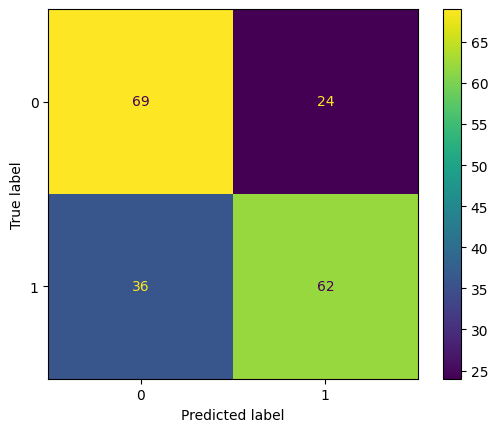

In [ ]:
from sklearn.ensemble import BaggingClassifier

base_estimator = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=base_estimator, random_state=0)

param_grid = {
    'n_estimators': [5, 10, 20],          
    'base_estimator__max_depth': [None, 5, 10],  
}

grid_search = GridSearchCV(bagging_clf, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_bagging_clf = grid_search.best_estimator_
Y_pred = best_bagging_clf.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.66      0.74      0.70        93
           1       0.72      0.63      0.67        98

    accuracy                           0.69       191
   macro avg       0.69      0.69      0.69       191
weighted avg       0.69      0.69      0.69       191



* GradientBoosting

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}


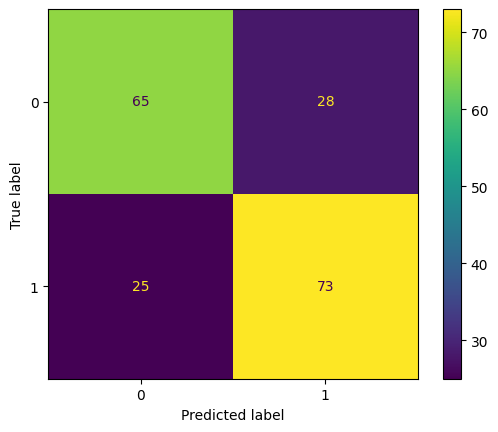

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=0)

param_grid = {
    'n_estimators': [100, 500, 1000], 
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': [3, 5, 7],  
}

grid_search = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, Y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_clf = grid_search.best_estimator_
Y_pred = best_clf.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71        93
           1       0.72      0.74      0.73        98

    accuracy                           0.72       191
   macro avg       0.72      0.72      0.72       191
weighted avg       0.72      0.72      0.72       191



* Stack

Best hyperparameters: {'bnb__alpha': 0.1, 'dt__max_depth': 20, 'final_estimator__C': 10, 'svc__C': 0.1}


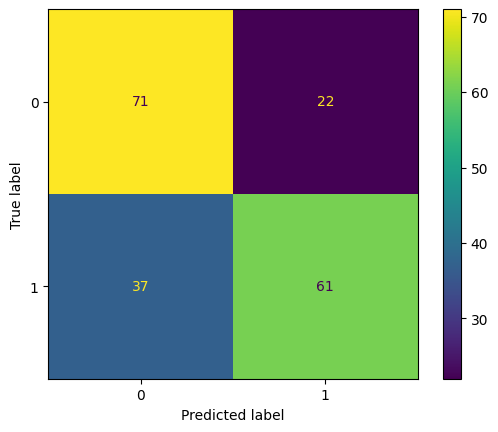

In [ ]:
from sklearn.ensemble import StackingClassifier

base_models = [('dt', DecisionTreeClassifier()), ('bnb', BernoulliNB()), ('svc', SVC())]

final_layer = LogisticRegression()
stacking_model = StackingClassifier(estimators=base_models, final_estimator=final_layer, cv=5)

param_grid = {
    'dt__max_depth': [None, 10, 20, 30],
    'bnb__alpha': [0.1, 0.5, 1.0],
    'svc__C': [0.1, 1, 10],
    'final_estimator__C': [0.1, 1, 10]
}

grid_search = GridSearchCV(stacking_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

best_model = grid_search.best_estimator_

best_model.fit(X_train, Y_train)

Y_pred = best_model.predict(X_test)
Y_pred_train = best_model.predict(X_train)

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print("Best hyperparameters:", grid_search.best_params_)


In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71        93
           1       0.73      0.62      0.67        98

    accuracy                           0.69       191
   macro avg       0.70      0.69      0.69       191
weighted avg       0.70      0.69      0.69       191

